## <font color='darkblue'>Predicting Credit Card Fraud</font>
Article from [here](https://www.kaggle.com/vishal1508/predicting-fraud-with-tensorflow-a03968). The goal for this analysis is to predict credit card fraud in the transactional data. I will be using tensorflow to build the predictive model, and t-SNE to visualize the dataset in two dimensions at the end of this analysis. If you would like to learn more about the data, visit: https://www.kaggle.com/dalpozz/creditcardfraud.

The sections of this analysis include:
* [Exploring the Data](#sect1)
* Building the Neural Network
* Visualizing the Data with t-SNE.

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# from show_confusion_matrix import show_confusion_matrix 
# the above is from http://notmatthancock.github.io/2015/10/28/confusion-matrix.html

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\john

In [35]:
df = pd.read_csv("datas/creditcard_sampling.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


<a id='sect1'></a>
## <font color='darkblue'>Exploring the Data</font>

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94806.670752,-0.034978,0.032672,-0.047768,0.036951,-0.022168,-0.002032,-0.037531,0.002747,-0.013038,...,0.010229,0.003571,0.000216,-0.001766,-0.000720,-0.000780,0.000984,0.000287,89.244793,0.008578
std,47530.375863,2.045278,1.697118,1.722270,1.480939,1.460808,1.336607,1.448339,1.354994,1.128094,...,0.813064,0.735134,0.626699,0.606670,0.523947,0.482308,0.420329,0.300628,267.622473,0.092221
min,0.000000,-36.802320,-63.344698,-32.965346,-5.416315,-40.427726,-17.118592,-43.557242,-50.943369,-13.434066,...,-22.889347,-10.933144,-19.331255,-2.836627,-7.081325,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54120.500000,-0.936390,-0.599433,-0.915232,-0.838288,-0.696548,-0.768371,-0.563940,-0.209955,-0.644441,...,-0.226324,-0.539106,-0.164064,-0.355587,-0.318531,-0.327345,-0.070875,-0.053027,5.515000,0.000000
50%,84799.000000,-0.006031,0.076345,0.166584,-0.002502,-0.057946,-0.271619,0.037312,0.024563,-0.051647,...,-0.026894,0.011610,-0.011959,0.040610,0.015754,-0.056210,0.002192,0.011169,22.120000,0.000000
75%,139412.500000,1.307431,0.822268,1.024277,0.770590,0.611351,0.402210,0.570522,0.332144,0.596613,...,0.190930,0.534799,0.148247,0.438502,0.351613,0.240497,0.095398,0.079702,77.890000,0.000000
max,172788.000000,2.411769,22.057729,9.382558,16.875344,24.655965,23.917837,44.054461,20.007208,15.594995,...,27.202839,8.361985,19.002942,3.951679,5.541598,3.463246,10.135597,15.866721,19656.530000,1.000000


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count     56863.000000
mean      94928.321967
std       47509.998728
min           0.000000
25%       54270.500000
50%       84872.000000
75%      139493.500000
max      172788.000000
Name: Time, dtype: float64


In [8]:
df.Time[df.Class == 1].head()

541      406.0
623      472.0
4920    4462.0
6108    6986.0
6329    7519.0
Name: Time, dtype: float64

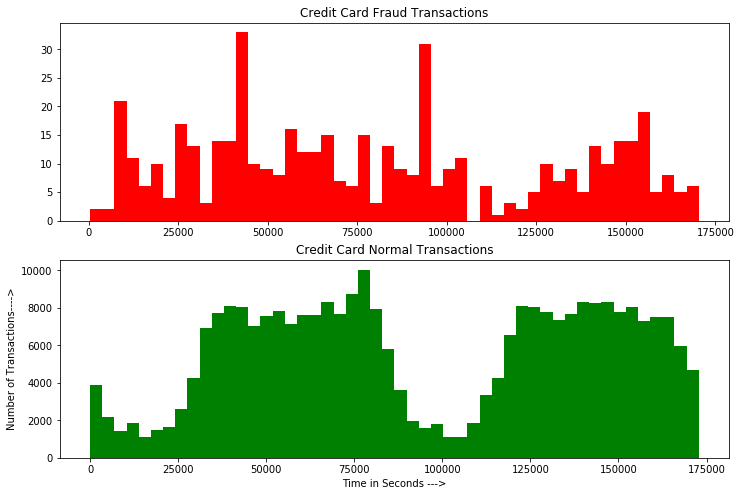

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1 , figsize=(12,8),edgecolor='black')

bins = 50

ax1.hist(df.Time[df.Class == 1], bins=bins, color='red')
ax1.set_title('Credit Card Fraud Transactions')

ax2.hist(df.Time[df.Class == 0], bins=bins, color='green')
ax2.set_title('Credit Card Normal Transactions')

plt.xlabel('Time in Seconds --->')
plt.ylabel('Number of Transactions---->')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Now let's see if the transaction amount differs between the two types.

In [19]:
bins = 30
hist, bin_edges = np.histogram(df.Amount[df.Class == 0], bins=bins)
bin_edges[:5]

array([   0.        ,  655.21766667, 1310.43533333, 1965.653     ,
       2620.87066667])

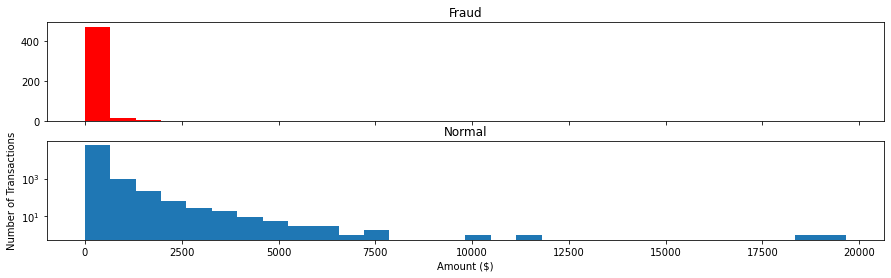

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,4))

ax1.hist(df.Amount[df.Class == 1], bins = bin_edges, color='r')
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bin_edges)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Most fraudulent transactions are small amounts, less than `3000` roughly. So let's add one more feature here:

In [26]:
# Add one feature `Amount_max_fraud`
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 3000, 'Amount_max_fraud'] = 0
df[['Amount', 'Amount_max_fraud', 'Class']]

,Amount,Amount_max_fraud,Class
0,0.00,0,1
1,529.00,0,1
2,239.93,0,1
3,59.00,0,1
4,1.00,0,1
...,...,...,...
57350,12.56,0,0
57351,1033.24,0,0
57352,1.38,0,0
57353,0.89,0,0


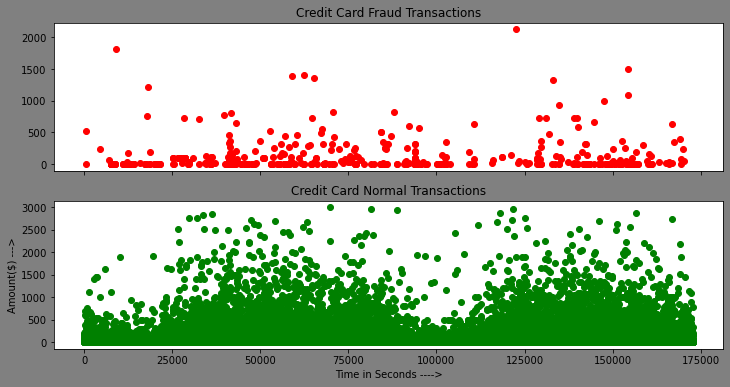

In [24]:
sub_df = df[df['Amount_max_fraud'] == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6), facecolor='grey')

ax1.scatter(sub_df.Time[df.Class == 1], sub_df.Amount[df.Class == 1], color='r')
ax1.set_title('Credit Card Fraud Transactions')

ax2.scatter(sub_df.Time[df.Class == 0], sub_df.Amount[df.Class == 0], color='g')
ax2.set_title('Credit Card Normal Transactions')

plt.xlabel('Time in Seconds ---->')
plt.ylabel('Amount($) --->')
plt.show()

Nothing too useful here. Next, let's take a look at the anonymized features.

In [28]:
#Select only the anonymized features.
v_features = df.iloc[:,1:29].columns
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

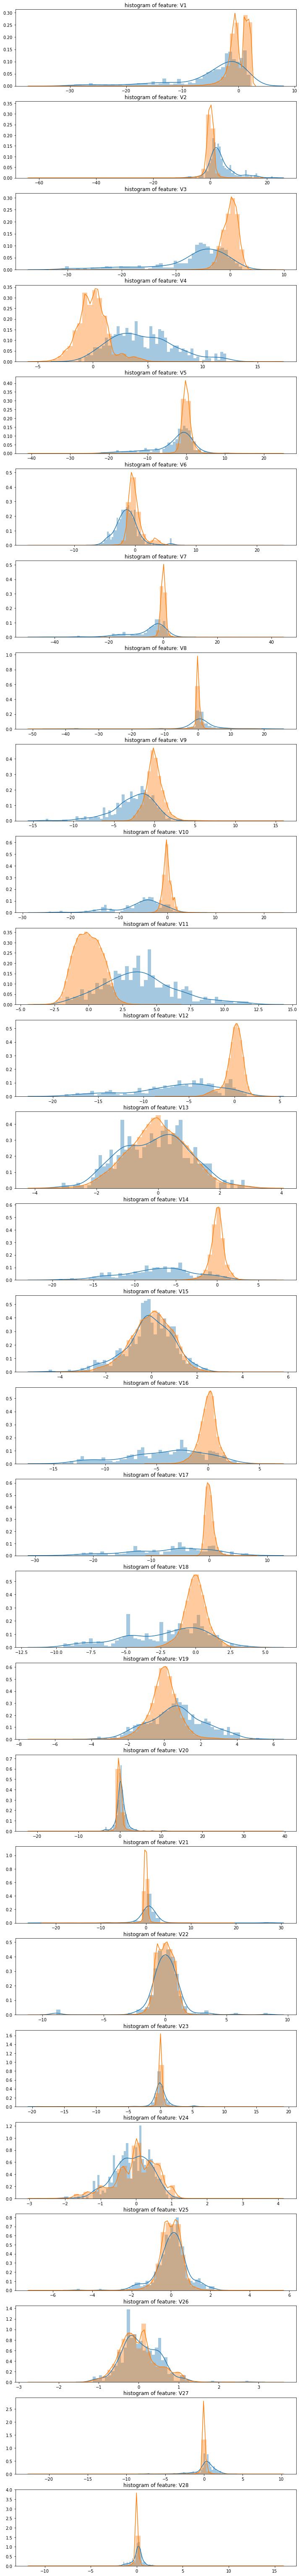

In [29]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    
plt.show()

In [36]:
# Drop all of the features that have very similar distributions between the two types of transactions.
# df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
df = df.drop(['V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis =1)

In [37]:
# Based on the plots above, these features are created to identify values where fraudulent transaction are LESS common.
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [38]:
#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0
df = df.astype({'Normal':int})

In [39]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})
df[['Time', 'Fraud', 'Normal', 'Amount']].head(n=20)

,Time,Fraud,Normal,Amount
0,406,1,0,0.00
1,472,1,0,529.00
2,4462,1,0,239.93
3,6986,1,0,59.00
4,7519,1,0,1.00
5,7526,1,0,1.00
6,7535,1,0,1.00
7,7543,1,0,1.00
8,7551,1,0,1.00
9,7610,1,0,1.00


In [50]:
# Imbalanced dataset
normal_count, fraud_count = df[df.Fraud==0].shape[0], df[df.Fraud==1].shape[0]
print("Minority rate={:.03f}%".format(100*fraud_count/df.shape[0]))

Minority rate=0.858%


In [51]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option("display.max_columns", 101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,-2.770089,-2.772272,3.202033,-2.899907,-4.289254,-1.140747,-2.830056,-0.016822,0.416956,0.517232,0.00,1,0,0,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.270953,-0.838587,-0.414575,-0.503141,-1.692029,0.666780,0.599717,1.725321,0.283345,0.661696,529.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.238253,-1.525412,2.032912,-6.560124,-1.470102,-2.282194,-4.781831,-2.615665,-1.334441,-0.294166,239.93,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.247768,-4.801637,4.895844,-10.912819,-6.771097,-7.358083,-12.598419,-5.131549,0.308334,0.573574,59.00,1,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-1.282858,-2.447469,2.101344,-4.609628,-6.079337,2.581851,6.739384,3.042493,-2.721853,-0.379068,1.00,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0


In [52]:
# Create dataframes of only Fraud and Normal transactions.
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [53]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

In [54]:
# Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [55]:
#Add our target features to y_train and y_test.
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [56]:
#Drop target features from X_train and X_test.
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [57]:
#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

45884
45884
11471
11471


In [58]:
'''
Due to the imbalance in the data, ratio will act as an equal weighting system for our model. 
By dividing the number of transactions by those that are fraudulent, ratio will equal the value that when multiplied
by the number of fraudulent transactions will equal the number of normal transaction. 
Simply put: # of fraud * ratio = # of normal
'''
ratio = len(X_train)/count_Frauds 

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [59]:
#Names of all of the features in X_train.
features = X_train.columns.values

#Transform each feature in features so that it has a mean of 0 and standard deviation of 1; 
#this helps with training the neural network.
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

## <font color='darkblue'>Train the Neural Net</font>